In [22]:
import pandas as pd
from insight_utils import bar_groups_chart, box_plot
from constants import FORMAT_MODIFIERS, LENGTH_MODIFIERS, DENSENESS_MODIFIERS, QUALITY_MODIFIERS, STRUCTURE_MODIFIERS

modifiers_path = "results/modifiers/gpt-3.5-turbo-16k/"
results_path = "results/gpt-3.5-turbo-16k/initial/"
base_prompt_df = pd.read_csv(results_path + "base_prompt.csv")
structure_df = pd.read_csv(modifiers_path + "newstructure.csv")

#### Format

In [23]:
structure_df.head()

,prompt_template,examples,num_examples,text,title,prompt,prediction,finish_reason,bert_score,rogue_1,...,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets,geval_fluency,geval_relevance,geval_coherence,geval_consistency,config
0,well-constructed,[[]],0,"I'm a bit of a perfectionist. Now, how many ti...",NaN,user:\nSummarize the text. Text: ###\nI'm a bi...,The Rise of Perfectionism in Society\nPerfecti...,stop,[],[],...,0.0000,0,0,1,9,2.95,0.0,4.55,0.0,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
1,well-organized,[[]],0,"I'm a bit of a perfectionist. Now, how many ti...",NaN,user:\nSummarize the text. Text: ###\nI'm a bi...,The Prevalence and Negative Effects of Perfect...,stop,[],[],...,0.0625,0,0,3,9,2.95,0.0,4.45,0.0,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
2,well-arranged,[[]],0,"I'm a bit of a perfectionist. Now, how many ti...",NaN,user:\nSummarize the text. Text: ###\nI'm a bi...,The Prevalence and Consequences of Perfectioni...,stop,[],[],...,0.0000,0,1,3,9,2.85,0.0,4.45,0.0,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
3,well-ordered,[[]],0,"I'm a bit of a perfectionist. Now, how many ti...",NaN,user:\nSummarize the text. Text: ###\nI'm a bi...,The Celebration of Perfectionism\nPerfectionis...,stop,[],[],...,0.0000,0,0,0,9,3.00,0.0,4.65,0.0,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
4,well-structured,[[]],0,"I'm a bit of a perfectionist. Now, how many ti...",NaN,user:\nSummarize the text. Text: ###\nI'm a bi...,The Prevalence and Negative Effects of Perfect...,stop,[],[],...,0.0000,0,1,3,9,2.95,0.0,4.30,0.0,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."


In [24]:
for m in STRUCTURE_MODIFIERS:
    print(m)

well-constructed
well-organized
well-arranged
well-ordered
well-structured
well-phrased
well-composed
coherent
flowing
put together well
well put together
put together so that it flows well
put together so that they are connected well
put together so that there is a good flow
compiled so that it flows well
assembled so that they are well connected to each other
organized in a neat and systematic manner
neatly organized
arranged in a way that allows for a smooth and cohesive progression
arranged in a manner that ensures a strong connection between the different components


In [25]:
structure_df.describe()

,num_examples,title,slor,avg_error_count_score,errors,contradiction_ratio,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets,geval_fluency,geval_relevance,geval_coherence,geval_consistency
count,600.0,0.0,600.0,600.000000,600.000000,600.000000,600.000000,600.0,600.000000,600.000000,600.000000,600.000000,600.0,600.000000,600.0
mean,0.0,NaN,0.0,0.995282,0.693333,0.058844,0.017877,0.0,0.685000,1.355000,8.095000,2.900417,0.0,4.461017,0.0
std,0.0,NaN,0.0,0.011000,1.305934,0.086836,0.046228,0.0,0.464903,1.145059,1.754358,0.110865,0.0,0.156183,0.0
min,0.0,NaN,0.0,0.928604,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.150000,0.0,3.950000,0.0
25%,0.0,NaN,0.0,0.996212,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,2.850000,0.0,4.350000,0.0
50%,0.0,NaN,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,9.000000,2.950000,0.0,4.450000,0.0
75%,0.0,NaN,0.0,1.000000,1.000000,0.083333,0.000000,0.0,1.000000,2.000000,9.000000,3.000000,0.0,4.550000,0.0
max,0.0,NaN,0.0,1.000000,6.000000,0.500000,0.357143,0.0,1.000000,3.000000,9.000000,3.050000,0.0,4.950000,0.0


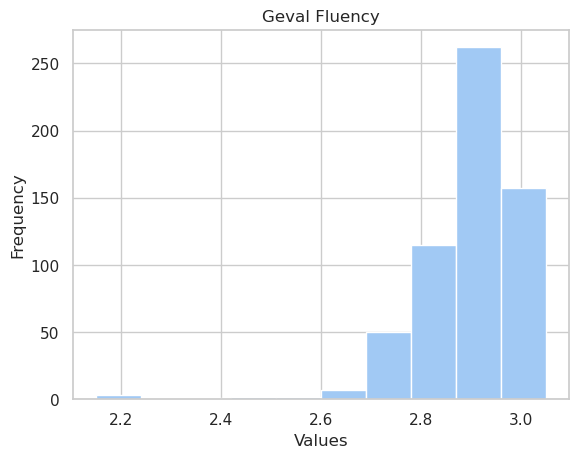

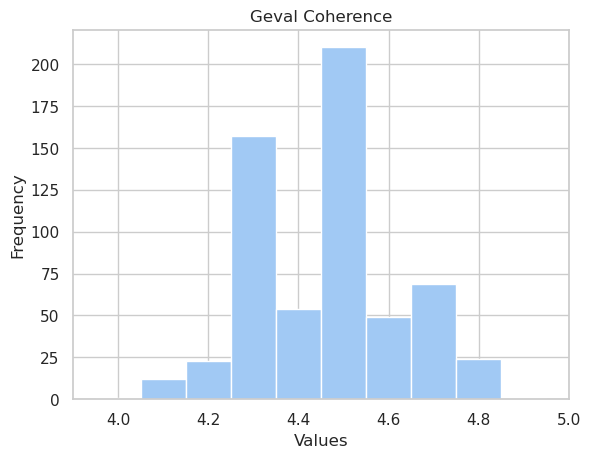

In [26]:
import matplotlib.pyplot as plt

# Create a histogram of a numerical column
plt.hist(structure_df["geval_fluency"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Fluency")
plt.show()

plt.hist(structure_df["geval_coherence"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Coherence")
plt.show()

#### Split results by modifier into separate dataframes

In [27]:
dataframes = [base_prompt_df]

for modifier in STRUCTURE_MODIFIERS:
    modifier_df = structure_df[structure_df["prompt_template"] == modifier]
    dataframes.append(modifier_df)

print("####### 30 tries per modifier #######\n")



####### 30 tries per modifier #######



#### To evaluate: entailment, errors, geval_fluency, geval_coherence

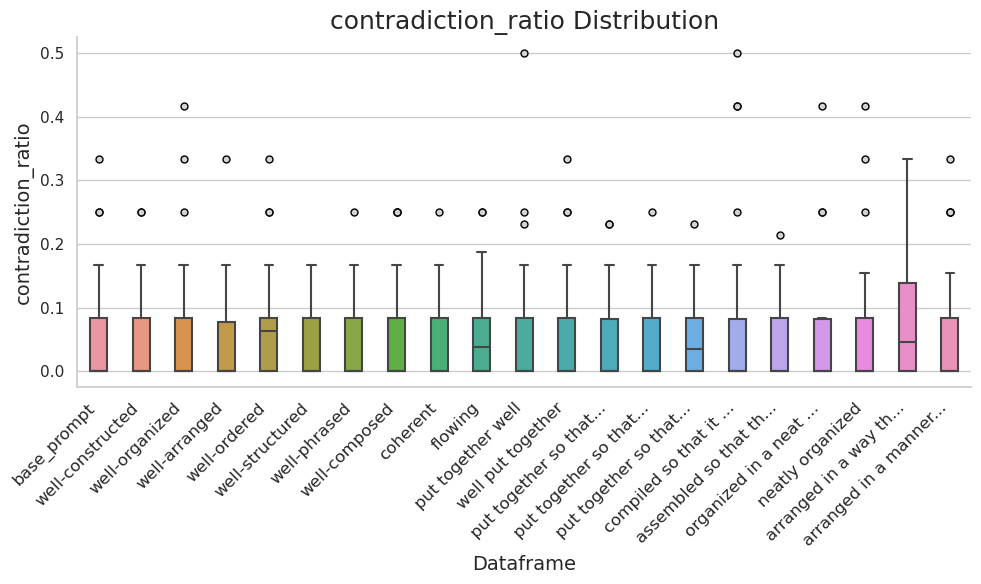

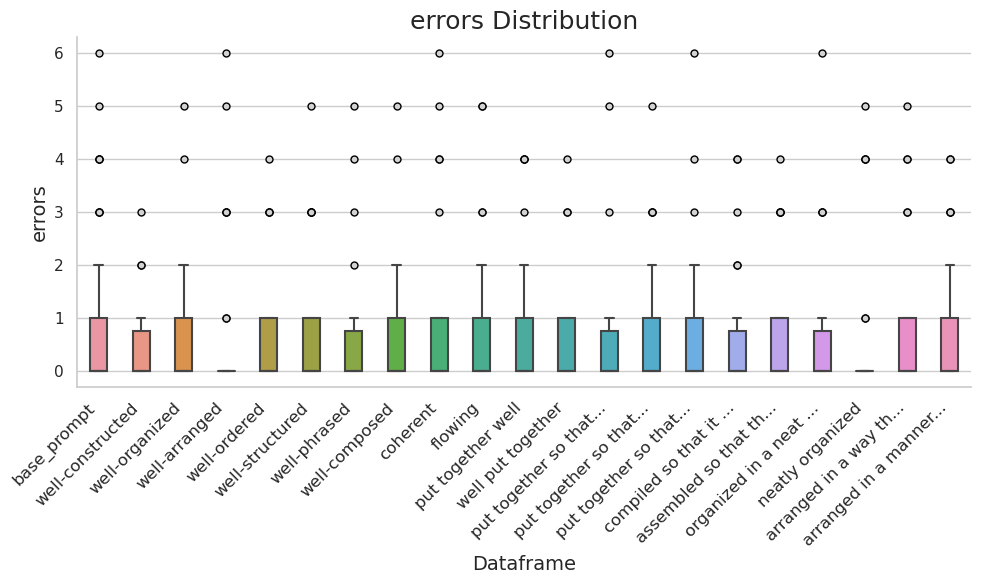

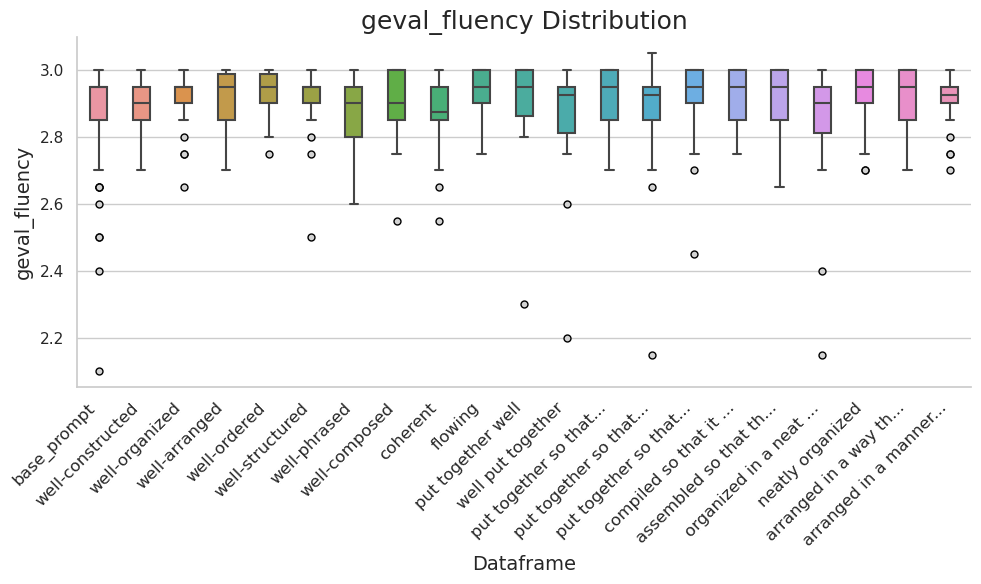

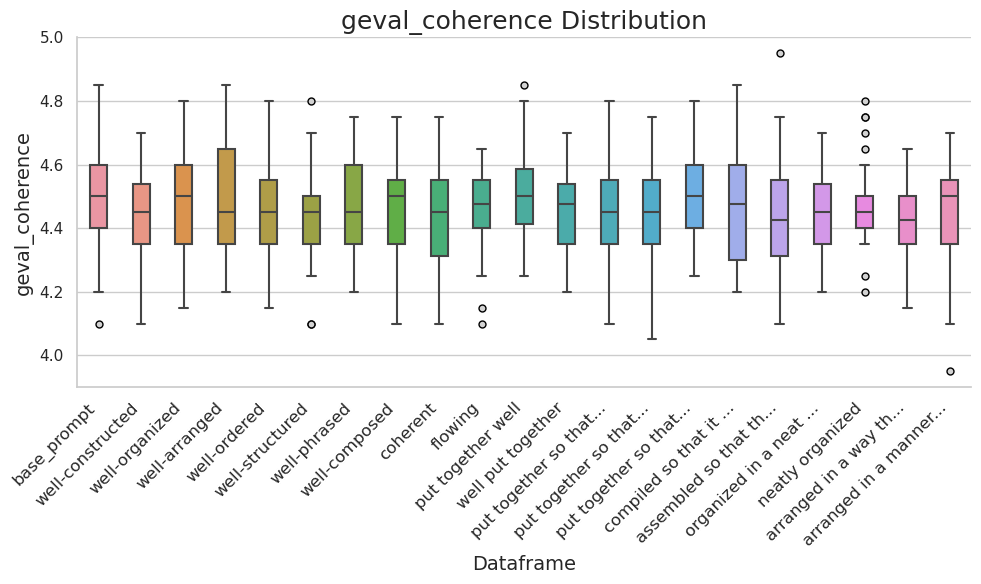

In [28]:
evaluate = ["contradiction_ratio", "errors", "geval_fluency", "geval_coherence"]

shortened_modifiers = []

for modifier in STRUCTURE_MODIFIERS:
    if len(modifier) > 20:
        shortened_modifiers.append(modifier[:20] + "...")
    else:
        shortened_modifiers.append(modifier)

for eval in evaluate:
    box_plot(dataframes, ["base_prompt"] + shortened_modifiers, eval)


# dic = {}

# for i, df in enumerate(dataframes):
    # success_rate = (df["three_by_three"].sum() / 30) * 100
    # modifier = QUALITY_MODIFIERS[i]
    # dic.update({modifier: round(success_rate)})

# sorted_dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))
# result_df = pd.DataFrame(sorted_dic.items(),columns=["Modifier", "Success Rate"])

# print(result_df.style.to_latex())